In [1]:
import torch

In [2]:
# vector
vec = torch.tensor([1,3,3,1])
print(vec)

tensor([1, 3, 3, 1])


In [4]:
# 3d tensor
ten_2d = torch.tensor([[1,2,4],[2,3,1]])
print(ten_2d)

tensor([[1, 2, 4],
        [2, 3, 1]])


In [5]:
# multplication 
mult = ten_2d * 2
mult

tensor([[2, 4, 8],
        [4, 6, 2]])

In [6]:
images = torch.rand(4,28,28)

second_image = images[1]

In [7]:
second_image

tensor([[0.6449, 0.4255, 0.0227, 0.8832, 0.0593, 0.8001, 0.2389, 0.8410, 0.3930,
         0.2549, 0.9066, 0.5673, 0.2115, 0.3306, 0.3119, 0.1734, 0.8626, 0.1566,
         0.1843, 0.4543, 0.5136, 0.6275, 0.8216, 0.9480, 0.5375, 0.9474, 0.1113,
         0.4695],
        [0.9901, 0.2169, 0.4241, 0.1279, 0.4998, 0.4417, 0.3024, 0.4713, 0.1065,
         0.9810, 0.0677, 0.4860, 0.5776, 0.6768, 0.2128, 0.6662, 0.1025, 0.5922,
         0.7230, 0.6424, 0.7280, 0.5057, 0.9729, 0.1652, 0.7894, 0.3159, 0.9671,
         0.6054],
        [0.5323, 0.4295, 0.0404, 0.3873, 0.8375, 0.9470, 0.6601, 0.3328, 0.6711,
         0.4021, 0.7751, 0.9185, 0.9398, 0.5005, 0.3391, 0.8983, 0.1794, 0.3976,
         0.9019, 0.3355, 0.6721, 0.7733, 0.1978, 0.8691, 0.9807, 0.3154, 0.3378,
         0.8439],
        [0.6382, 0.6425, 0.3441, 0.0386, 0.7225, 0.7083, 0.1111, 0.5841, 0.8443,
         0.4989, 0.5580, 0.8818, 0.1139, 0.9202, 0.1164, 0.5621, 0.2712, 0.8188,
         0.0985, 0.7538, 0.4323, 0.0798, 0.3062, 0.0168

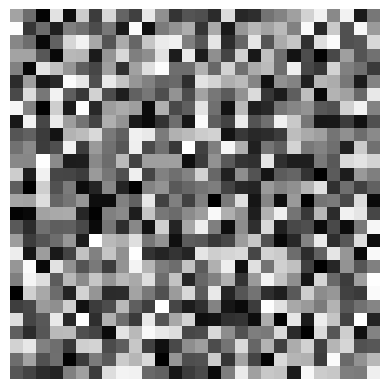

In [8]:
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap = 'gray')
plt.axis('off')
plt.show()

In [10]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,input_size):
        super(MLP,self).__init__()
        self.hidden_layer = nn.Linear(input_size,64)
        self.output_layer = nn.Linear(64,2)
        self.activation = nn.ReLU()

    def forward(self,x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

model = MLP(10)
print(model)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)


In [11]:
model.forward(torch.rand(10))

tensor([-0.0713,  0.1476], grad_fn=<ViewBackward0>)

##### Try yourself

In [1]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,input_size):
        super(MLP,self).__init__()
        self.hidden_layer = nn.Linear(input_size,30)
        self.out_layer = nn.Linear(30,2)
        self.activation = nn.ReLU()

    def forward(self,x):
        x = self.activation(self.hidden_layer(x))
        return self.out_layer(x)

model = MLP(5)
print(model)

MLP(
  (hidden_layer): Linear(in_features=5, out_features=30, bias=True)
  (out_layer): Linear(in_features=30, out_features=2, bias=True)
  (activation): ReLU()
)


In [5]:
model.forward(torch.rand(5))

tensor([-0.0587, -0.1345], grad_fn=<ViewBackward0>)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

dataset = NumberSumDataset(data_range=(1, 100))

for i in range(20):
    print(dataset[i])

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))
(tensor([1., 6.]), tensor([7.]))
(tensor([1., 7.]), tensor([8.]))
(tensor([1., 8.]), tensor([9.]))
(tensor([1., 9.]), tensor([10.]))
(tensor([ 1., 10.]), tensor([11.]))
(tensor([ 1., 11.]), tensor([12.]))
(tensor([ 1., 12.]), tensor([13.]))
(tensor([ 1., 13.]), tensor([14.]))
(tensor([ 1., 14.]), tensor([15.]))
(tensor([ 1., 15.]), tensor([16.]))
(tensor([ 1., 16.]), tensor([17.]))
(tensor([ 1., 17.]), tensor([18.]))
(tensor([ 1., 18.]), tensor([19.]))
(tensor([ 1., 19.]), tensor([20.]))
(tensor([ 1., 20.]), tensor([21.]))


In [3]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [5]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, loss))

Epoch 0: Sum of Batch Losses = 191.19571
Epoch 1: Sum of Batch Losses = 58.54060
Epoch 2: Sum of Batch Losses = 5.88175
Epoch 3: Sum of Batch Losses = 1.11041
Epoch 4: Sum of Batch Losses = 0.82065
Epoch 5: Sum of Batch Losses = 0.49825
Epoch 6: Sum of Batch Losses = 0.25232
Epoch 7: Sum of Batch Losses = 0.08725
Epoch 8: Sum of Batch Losses = 0.08428
Epoch 9: Sum of Batch Losses = 0.05697
Epoch 10: Sum of Batch Losses = 0.03579
Epoch 11: Sum of Batch Losses = 0.04387
Epoch 12: Sum of Batch Losses = 0.04486
Epoch 13: Sum of Batch Losses = 0.03370
Epoch 14: Sum of Batch Losses = 0.04457
Epoch 15: Sum of Batch Losses = 0.03097
Epoch 16: Sum of Batch Losses = 0.02117
Epoch 17: Sum of Batch Losses = 0.02440
Epoch 18: Sum of Batch Losses = 0.02488
Epoch 19: Sum of Batch Losses = 0.01985
Epoch 20: Sum of Batch Losses = 0.02263
Epoch 21: Sum of Batch Losses = 0.01807
Epoch 22: Sum of Batch Losses = 0.01632
Epoch 23: Sum of Batch Losses = 0.01683
Epoch 24: Sum of Batch Losses = 0.01605
Epoch 2

In [9]:
model(torch.tensor([0.0,3.0]))

tensor([3.0050], grad_fn=<ViewBackward0>)

In [1]:
import transformers

In [4]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5c/01/5ab75f138bf32d7a69df61e4997e24eccad87cc009f5fb7e2a31af8a4036/torch-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/198.6 MB 4.3 MB/s eta 0:00:47
   ---------------------------------------- 0.5/198.6 MB 6.7 MB/s eta 0:00:30
   ---------------------------------------- 0.9/198.6 MB 7.1 MB/s eta 0:00:28
   ---------------------------------------- 1.2/198.6 MB 7.0 MB/s eta 0:00:29
   ---------------------------------------- 1.6/198.6 MB 7.1 MB/s eta 0:00:28
   ---------------------------------------- 2.1/198.6 MB 7.7 MB/s eta 0:00:26
   ---------------------------

In [2]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# See how many tokens are in the vocabulary
tokenizer.vocab_size

C:\Users\mayuo\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mayuo\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


30522

In [7]:
tokens = tokenizer.tokenize("I heart AI")

# Print the tokens
print(tokens)
# ['i', 'heart', 'genera', '##tive', 'ai']

# Show the token ids assigned to each token
print(tokenizer.convert_tokens_to_ids(tokens))

['i', 'heart', 'ai']
[1045, 2540, 9932]


In [2]:
import transformers
from transformers import BertForSequenceClassification, BertTokenizer

C:\Users\mayuo\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
model_name = 'textattack/bert-base-uncased-imdb'

C:\Users\mayuo\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mayuo\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


TypeError: BertForSequenceClassification.__init__() got an unexpected keyword argument 'num_lables'

In [4]:
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

In [5]:
import torch.nn as nn

In [8]:
class Mult_layer_P(nn.Module):
    def __init__(self,input_layer):
        super(Mult_layer_P,self).__init__()
        self.hidden_layer = nn.Linear(input_layer,128)
        self.output_layer = nn.Linear(128,10)
        self.activation = nn.ReLU()

    def forward(self,x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [10]:
model = Mult_layer_P(784)
model

Mult_layer_P(
  (hidden_layer): Linear(in_features=784, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
  (activation): ReLU()
)

In [11]:
class MyMLP(nn.Module):
    def __init__(self,input_size):
        super(MyMLP,self).__init__()
        self.fc1 = nn.Linear(input_size,128)
        self.fc2 = nn.Linear(128,10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim = 1)
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)

        return x
my_mlp = MyMLP(784)
my_mlp

MyMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [ ]:
## loss functions are in the nn.
## optimixer is in torch.optim

In [14]:
optimizer = torch.optim.SGD(my_mlp.parameters(), lr = .001) ### you have to have learning rate in it. 
loss_fn = nn.CrossEntropyLoss()

In [20]:
def fake_training_loaders():
    for _ in range(30):
        yield torch.randn(64,784), torch.randint(0,10,(64,))

for epochs in range(10):
    for i,data in enumerate(fake_training_loaders()):
        x,y = data

        optimizer.zero_grad()
        y_pred = my_mlp.forward(x)
        loss = loss_fn(y_pred,y)
        loss.backward()
        optimizer.step()
        
        print(f"Epoch {epochs}, batch {i}: {loss.item():.5f}")

Epoch 0, batch 0: 2.29579
Epoch 0, batch 1: 2.30623
Epoch 0, batch 2: 2.29794
Epoch 0, batch 3: 2.29932
Epoch 0, batch 4: 2.30344
Epoch 0, batch 5: 2.30210
Epoch 0, batch 6: 2.30491
Epoch 0, batch 7: 2.30574
Epoch 0, batch 8: 2.30233
Epoch 0, batch 9: 2.30364
Epoch 0, batch 10: 2.30122
Epoch 0, batch 11: 2.30416
Epoch 0, batch 12: 2.30604
Epoch 0, batch 13: 2.30462
Epoch 0, batch 14: 2.30706
Epoch 0, batch 15: 2.30281
Epoch 0, batch 16: 2.30690
Epoch 0, batch 17: 2.30099
Epoch 0, batch 18: 2.30464
Epoch 0, batch 19: 2.30269
Epoch 0, batch 20: 2.30288
Epoch 0, batch 21: 2.30096
Epoch 0, batch 22: 2.30188
Epoch 0, batch 23: 2.29818
Epoch 0, batch 24: 2.30780
Epoch 0, batch 25: 2.30740
Epoch 0, batch 26: 2.30149
Epoch 0, batch 27: 2.29938
Epoch 0, batch 28: 2.30191
Epoch 0, batch 29: 2.29997
Epoch 1, batch 0: 2.30631
Epoch 1, batch 1: 2.30022
Epoch 1, batch 2: 2.30567
Epoch 1, batch 3: 2.29967
Epoch 1, batch 4: 2.30588
Epoch 1, batch 5: 2.30850
Epoch 1, batch 6: 2.30473
Epoch 1, batch 7: 

#### Hugging face

In [21]:
# Replace <MASK> with the appropriate code to complete the exercise.

# Get the model and tokenizer

from transformers import AutoModelForSequenceClassification, AutoTokenizer

pt_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')


def get_prediction(review):
    """Given a review, return the predicted sentiment"""

    # Tokenize the review
    # (Get the response as tensors and not as a list)
    inputs = tokenizer(review, return_tensors='pt')

    # Perform the prediction (get the logits)
    outputs = pt_model(**inputs)

    # Get the predicted class (corresponding to the highest logit)
    predictions = torch.argmax(outputs.logits, dim=-1)

    return "positive" if predictions.item() == 1 else "negative"

In [22]:
get_prediction('this movie is great')

'positive'

In [23]:
from datasets import load_dataset

In [27]:
dataset = load_dataset('squad')
dataset

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/mayuo/.cache/huggingface/datasets/parquet/plain_text-57edf78d6033ac9a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [ ]:
dt_v1 = load_dataset('imdb', split= ['train'])
dt_v1

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset('sms_spam',split = ['train'])[0]
dataset

Generating train split:   0%|          | 0/5574 [00:00<?, ? examples/s]

Dataset sms_spam downloaded and prepared to C:/Users/mayuo/.cache/huggingface/datasets/sms_spam/plain_text/1.0.0/53f051d3b5f62d99d61792c91acefe4f1577ad3e4c216fb0ad39e30b9f20019c. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['sms', 'label'],
    num_rows: 5574
})

In [3]:
for entry in dataset.select(range(3)):
    sms = entry['sms']
    label = entry['label']
    print(f'label = {label}, sms = {sms}')

label = 0, sms = Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label = 0, sms = Ok lar... Joking wif u oni...

label = 1, sms = Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [5]:
### making dict to help us understand labels better
id2label = {0 : 'Not Spam',
            1 : 'Spam'}
label2id = {'Not Spam': 0,
            'Spam': 1}

In [9]:
for entry in dataset.select(range(5)):
    sms = entry['sms']
    id_label = entry['label']
    print(f'label = {id2label[id_label]}\nsms = {sms}')

label = Not Spam
sms = Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label = Not Spam
sms = Ok lar... Joking wif u oni...

label = Spam
sms = Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

label = Not Spam
sms = U dun say so early hor... U c already then say...

label = Not Spam
sms = Nah I don't think he goes to usf, he lives around here though



In [13]:
def get_sms_messages_string(dataset, range_of_items, include_label = False):
    for num,data in zip(range_of_items,dataset.select(range_of_items)):
        sms = data['sms']
        id_label = data['label']

        if include_label:
            
            print(f'label = {id2label[id_label]}\nsms = {sms}')
        else:
            print(f'The sms is {sms}')

In [14]:
get_sms_messages_string(dataset, range(3), include_label=True)

label = Not Spam
sms = Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label = Not Spam
sms = Ok lar... Joking wif u oni...

label = Spam
sms = Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

